# Test sklearn_xarray

Using toy datasets first, then move on to polygons

In [1]:
import sys 
import os
import s3fs

rel_path = "../src"
directory_path = os.path.abspath(os.path.join(os.getcwd(), rel_path))
sys.path.append(directory_path)

from nex_gddp_cmip6 import get_nex_dataset, TIME_OPTIMIZED_SCENARIOS, AVAILABLE_VARIABLES, select_region

import xarray as xr
import pandas as pd
import numpy as np
from sklearn_xarray import wrap

import geopandas as gpd

import matplotlib.pyplot as plt

import dask
from dask.distributed import Client

In [2]:
# Initiate Dask Cluster

endpoint = ""

if endpoint:
    client = Client(endpoint)

else:
    client = Client()

client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 12,Total memory: 15.93 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:62088,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 15.93 GiB
Comm: tcp://127.0.0.1:62107,Total threads: 3
Dashboard: http://127.0.0.1:62110/status,Memory: 3.98 GiB
Nanny: tcp://127.0.0.1:62091,


In [3]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 15MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 15MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [4]:
data = ds.air.isel(lat=0,lon=0)
data

<xarray.DataArray 'air' (time: 2920)> Size: 12kB
array([241.2    , 242.09999, 242.29999, ..., 243.48999, 245.79   ,
       245.09   ], dtype=float32)
Coordinates:
    lat      float32 4B 75.0
    lon      float32 4B 200.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

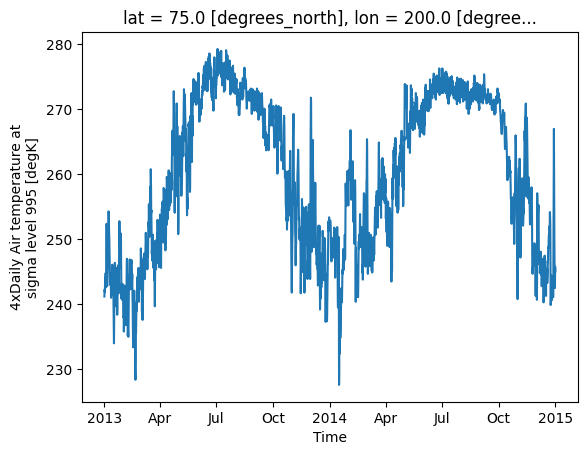

In [5]:
data.plot()

Since this is just a test, I will train and test across a year.

In [6]:
train_da = data.sel(time=slice('2013-01-01','2013-12-31'))
test_da = data.sel(time=slice('2014-01-01','2014-12-31'))

## Import sklearn models

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
pca_wrapped = wrap(PCA(n_components=5),reshapes={'point':['lat','lon']}).fit_transform(da)

ValueError: Expected 2D array, got 1D array instead:
array=[241.2     242.09999 242.29999 ... 243.48999 245.79    245.09   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
# standard_wrapped = wrap(StandardScaler,reshapes={'point':['lat','lon']},sample_dim='time').fit_transform(da)

The wrapper wasn't working, and I'm not entirely sure why my reshaping is not helping, so I tried with their given example.

In [24]:
from sklearn_xarray.datasets import load_dummy_dataarray

In [25]:
X = load_dummy_dataarray()
Xt = wrap(StandardScaler,reshapes='feature').fit_transform(X)

In [26]:
pca_wrapped = wrap(PCA(n_components=3),reshapes = 'feature').fit_transform(X)

In [27]:
pca_wrapped

<xarray.DataArray (sample: 100, feature: 3)> Size: 2kB
array([[-0.2738539 , -0.44435626,  0.0372895 ],
       [ 0.42356901, -0.27676675,  0.13689007],
       [-0.31024651,  0.55789457,  0.0626509 ],
       [-0.42740992, -0.08120449,  0.02882544],
       [ 0.18244026, -0.13776057,  0.26693438],
       [ 0.51185561, -0.06607688, -0.13193077],
       [-0.37007348, -0.31279157,  0.46488722],
       [-0.51350463,  0.08600466, -0.13637837],
       [ 0.28243066, -0.39572037, -0.10727039],
       [-0.01661331,  0.19502293,  0.31787557],
       [-0.6994525 ,  0.20484341,  0.27724193],
       [-0.01896539, -0.47330597,  0.18189011],
       [ 0.13040733, -0.6334868 ,  0.21004481],
       [-0.08927004,  0.00897302, -0.05382029],
       [ 0.59135743, -0.08597981, -0.47752294],
       [ 0.23057004, -0.03972747, -0.14345315],
       [ 0.1000823 , -0.01898202,  0.41630383],
       [ 0.39175702,  0.47003179,  0.12580771],
       [ 0.28047753, -0.6087626 , -0.34774832],
       [-0.41520461, -0.09001468, -0.3938207 ],
...
       [-0.52461187,  0.24229336,  0.17347528],
       [-0.36643358,  0.47192686, -0.28117789],
       [-0.40767629, -0.55964083, -0.09508794],
       [ 0.16473695, -0.19792634,  0.32311418],
       [-0.5150932 ,  0.09807066,  0.0522771 ],
       [ 0.4962133 , -0.21197225,  0.02639193],
       [ 0.03694005, -0.0257481 , -0.73032361],
       [ 0.38892739, -0.56396247,  0.59859477],
       [-0.23080761,  0.19757494, -0.24066255],
       [-0.38223538, -0.50354401, -0.6750127 ],
       [-0.06693256,  0.26673244, -0.53307274],
       [-0.08097832, -0.50381885,  0.03560507],
       [-0.55421238, -0.19365934, -0.42976912],
       [ 0.24354925,  0.03420372,  0.0641183 ],
       [ 0.18264589, -0.01109877, -0.37033229],
       [-0.09578402,  0.53778367, -0.14256872],
       [-0.49655618, -0.37491383, -0.0622331 ],
       [-0.06865481,  0.4764832 , -0.11303834],
       [ 0.25181949, -0.07257566, -0.01347686],
       [-0.0635601 ,  0.20569627, -0.33628805]])
Coordinates:
  * sample   (sample) int32 400B 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
Dimensions without coordinates: feature

This does work so maybe I am missing something with how I am slicing my data.

In [14]:
test_da = ds.air.sel(lat=slice(75,50),lon=slice(200,250))
test_da

<xarray.DataArray 'air' (time: 2920, lat: 11, lon: 21)> Size: 3MB
array([[[241.2    , 242.5    , 243.5    , ..., 242.89   , 244.79999,
         246.5    ],
        [243.79999, 244.5    , 244.7    , ..., 239.29999, 240.7    ,
         242.     ],
        [250.     , 249.79999, 248.89   , ..., 239.79999, 240.09999,
         240.39   ],
        ...,
        [275.9    , 276.9    , 276.9    , ..., 276.1    , 273.9    ,
         267.1    ],
        [276.69998, 277.4    , 277.69998, ..., 271.5    , 272.79   ,
         269.5    ],
        [277.29   , 277.4    , 277.79   , ..., 265.19998, 268.1    ,
         269.79   ]],

       [[242.09999, 242.7    , 243.09999, ..., 241.     , 242.39   ,
         244.     ],
        [243.59999, 244.09999, 244.2    , ..., 239.2    , 240.29999,
         241.59999],
        [253.2    , 252.89   , 252.09999, ..., 240.59999, 240.5    ,
         240.59999],
...
        [276.88998, 277.88998, 278.69   , ..., 269.88998, 269.79   ,
         267.49   ],
        [276.79   , 277.29   , 278.29   , ..., 267.88998, 270.59   ,
         269.29   ],
        [277.59   , 278.29   , 279.09   , ..., 266.49   , 270.29   ,
         270.88998]],

       [[245.09   , 244.29   , 243.29   , ..., 240.48999, 241.59   ,
         242.79   ],
        [249.89   , 249.29   , 248.39   , ..., 242.59   , 243.59   ,
         244.39   ],
        [262.99   , 262.19   , 261.38998, ..., 243.09   , 244.98999,
         246.09   ],
        ...,
        [276.79   , 277.49   , 277.99   , ..., 270.69   , 269.79   ,
         268.09   ],
        [276.88998, 277.29   , 277.59   , ..., 265.69   , 268.19   ,
         268.69   ],
        [277.59   , 277.38998, 277.59   , ..., 262.49   , 265.99   ,
         268.38998]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 44B 75.0 72.5 70.0 67.5 65.0 ... 57.5 55.0 52.5 50.0
  * lon      (lon) float32 84B 200.0 202.5 205.0 207.5 ... 245.0 247.5 250.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [56]:
pca_wrapped = wrap(PCA(n_components=5),reshapes='lon').fit_transform(test_da)
pca_wrapped

<xarray.DataArray (time: 2920, lon: 5)> Size: 58kB
array([[ 76.124405  ,  -4.2212987 ,   4.1326103 , -10.126873  ,
          0.25611576],
       [ 73.6388    ,  -2.8526642 ,  -2.7424016 ,  -7.260182  ,
          1.7572399 ],
       [ 67.05405   ,  -4.896129  , -11.582708  ,  -4.015515  ,
          2.770573  ],
       ...,
       [ 85.01132   , -12.930233  ,  10.783711  ,  -1.3754256 ,
          2.5136282 ],
       [ 85.36904   ,  -6.5025964 ,   9.649746  ,  -0.4736436 ,
          3.1624713 ],
       [ 82.88443   ,  -4.812879  ,   5.119328  ,  -0.92525595,
          2.2959983 ]], dtype=float32)
Coordinates:
    lat      float32 4B 75.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Dimensions without coordinates: lon

It works, but I had to give up longitude as a dimension. I don't think this will be viable going forward.

## Testing Dask-ML

In [7]:
from dask_ml.decomposition import PCA

In [15]:
# transform into dask array
test_dask = dask.array.from_array(test_da)
test_dask.compute()

<xarray.DataArray 'air' (time: 2920, lat: 11, lon: 21)> Size: 3MB
array([[[241.2    , 242.5    , 243.5    , ..., 242.89   , 244.79999,
         246.5    ],
        [243.79999, 244.5    , 244.7    , ..., 239.29999, 240.7    ,
         242.     ],
        [250.     , 249.79999, 248.89   , ..., 239.79999, 240.09999,
         240.39   ],
        ...,
        [275.9    , 276.9    , 276.9    , ..., 276.1    , 273.9    ,
         267.1    ],
        [276.69998, 277.4    , 277.69998, ..., 271.5    , 272.79   ,
         269.5    ],
        [277.29   , 277.4    , 277.79   , ..., 265.19998, 268.1    ,
         269.79   ]],

       [[242.09999, 242.7    , 243.09999, ..., 241.     , 242.39   ,
         244.     ],
        [243.59999, 244.09999, 244.2    , ..., 239.2    , 240.29999,
         241.59999],
        [253.2    , 252.89   , 252.09999, ..., 240.59999, 240.5    ,
         240.59999],
...
        [276.88998, 277.88998, 278.69   , ..., 269.88998, 269.79   ,
         267.49   ],
        [276.79   , 277.29   , 278.29   , ..., 267.88998, 270.59   ,
         269.29   ],
        [277.59   , 278.29   , 279.09   , ..., 266.49   , 270.29   ,
         270.88998]],

       [[245.09   , 244.29   , 243.29   , ..., 240.48999, 241.59   ,
         242.79   ],
        [249.89   , 249.29   , 248.39   , ..., 242.59   , 243.59   ,
         244.39   ],
        [262.99   , 262.19   , 261.38998, ..., 243.09   , 244.98999,
         246.09   ],
        ...,
        [276.79   , 277.49   , 277.99   , ..., 270.69   , 269.79   ,
         268.09   ],
        [276.88998, 277.29   , 277.59   , ..., 265.69   , 268.19   ,
         268.69   ],
        [277.59   , 277.38998, 277.59   , ..., 262.49   , 265.99   ,
         268.38998]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 44B 75.0 72.5 70.0 67.5 65.0 ... 57.5 55.0 52.5 50.0
  * lon      (lon) float32 84B 200.0 202.5 205.0 207.5 ... 245.0 247.5 250.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [18]:
dask_ml_test = PCA(n_components=3,svd_solver='full').fit_transform(test_dask)

ValueError: too many values to unpack (expected 2)

In [19]:
test_dask.shape

(2920, 11, 21)

Even the dask ml wants a flat array. Sklearn will probably still be best, but distributed computing could be integrated later.